In [1]:
# Necessay imports
import pandas as pd
import lightkurve as lk
import matplotlib.pyplot as plt
import csv
import re
import matplotlib.gridspec as gridspec

from lightcurve_data import *
from lc_sine import *

In [4]:
# with open("apjac8352/datafile.txt", "r") as file:
#     lines = file.readlines()
# # content = content.split("\n")
# # lines = lines[25:]
# for i, line in enumerate(lines[26:]):
#     # Replace spaces with Nans
#     tmp = line.replace("        ", ' Nan ')
#     lines[i] = tmp

In [5]:
# # Clean and format each line: replace varying spaces with commas
# cleaned_lines = [re.sub(r'\s+', ',', line.strip()) for line in lines]

# # Create header
# header = 'TIC,TESS Sector,Flare peak time (BJD),Flare amplitude (relative),Estimated flare energy 1,Estimated flare energy 2,Number of fitted flare profiles,Possible flare detection'

# # Write the cleaned data to a CSV file
# with open('flare_data.csv', 'w') as f:
#     f.write(header + '\n')
#     for line in cleaned_lines:
#         f.write(line + '\n')


In [2]:
flaredf = pd.read_csv('flare_data.csv')

flarey = flaredf[flaredf['Number of fitted flare profiles'] >= 2.0] # FLARES
flarey

,TIC,TESS Sector,Flare peak time (BJD),Flare amplitude (relative),Estimated flare energy 1,Estimated flare energy 2,Number of fitted flare profiles,Possible flare detection
8,67228,11,1618.6013,0.0041,1.01e+34,Nan,2.0,N
12,68069,11,1604.3220,0.1122,4.03e+32,3.65e+32,2.0,N
17,68069,11,1623.3567,0.1073,4.12e+32,3.72e+32,2.0,N
37,102723,11,1620.6816,0.0439,2.37e+33,1.33e+33,2.0,N
74,593228,5,1460.9271,0.0507,7.70e+32,4.80e+32,2.0,N
...,...,...,...,...,...,...,...,...
147633,520660922,39,2379.6243,0.2244,Nan,Nan,2.0,N
147639,735128403,39,2376.0454,0.4161,Nan,Nan,2.0,N
147652,1005005438,39,2376.4390,0.0282,6.16e+34,3.62e+34,2.0,N
147657,1005005438,39,2389.0737,0.0289,5.53e+34,3.25e+34,2.0,N


In [3]:
no_flares = flaredf[flaredf['Number of fitted flare profiles'] < 2.0]
no_flares

,TIC,TESS Sector,Flare peak time (BJD),Flare amplitude (relative),Estimated flare energy 1,Estimated flare energy 2,Number of fitted flare profiles,Possible flare detection
0,11182,11,1602.7499,0.0410,5.30e+32,4.00e+32,0.0,N
1,11182,11,1607.5804,0.0428,1.08e+33,8.12e+32,1.0,N
2,11182,11,1608.1249,0.1659,2.19e+33,1.65e+33,1.0,N
3,11182,11,1623.0985,0.0425,8.50e+32,6.42e+32,0.0,N
4,33905,11,1615.1735,0.0454,4.36e+32,2.55e+32,0.0,N
...,...,...,...,...,...,...,...,...
147680,2025820827,39,2380.4224,0.0596,Nan,Nan,0.0,N
147681,2025820827,39,2388.0266,0.3146,Nan,Nan,1.0,N
147682,1005005438,39,2385.2432,0.0085,9.98e+33,5.88e+33,0.0,N
147698,1309570852,39,2366.7397,0.0669,1.73e+34,9.28e+33,0.0,N


/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_60855/2368905816.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


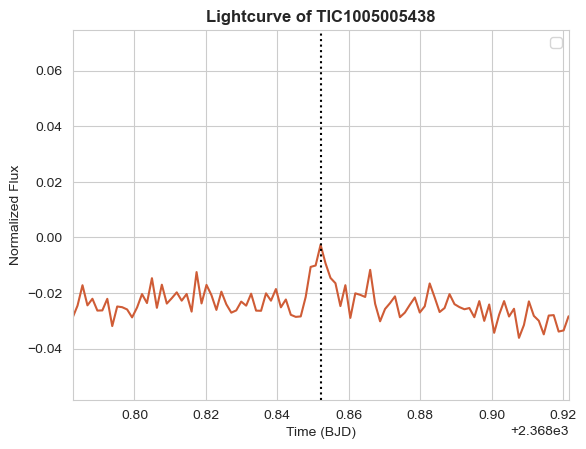

In [4]:
lightcurve_data = LightcurveData('TIC1310815601', 120)

testseries = no_flares[no_flares['TIC'] == 1310815601].iloc[0]

# Get the 100 time steps
delta_x = lightcurve_data.time[1] - lightcurve_data.time[0]

sns.set_style("whitegrid")
plt.plot(lightcurve_data.time, lightcurve_data.flux, color = '#CF5C36')
plt.xlim(testseries['Flare peak time (BJD)'] - delta_x*50, testseries['Flare peak time (BJD)'] + delta_x*50)
plt.axvline(x = testseries['Flare peak time (BJD)'], color = 'black', ls = 'dotted')
# plt.axvline(x = 2376.4390, color = '#000000', label = 'Flare', ls = 'dashed')
plt.title('Lightcurve of TIC1005005438', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()


In [44]:
lightcurve_data = LightcurveData('TIC102723', 120)

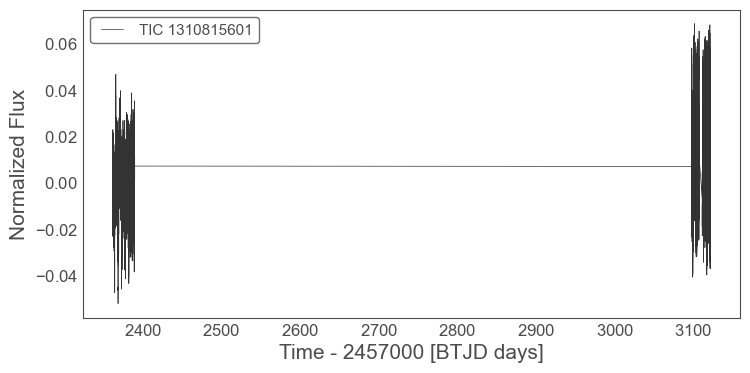

In [5]:
lightcurve_data.lightcurve.plot()
# plt.xlim(2360, 2387)
plt.show()

In [46]:
testseries = flarey[flarey['TIC'] == 102723].iloc[0]
testseries

TIC                                   102723
TESS Sector                               11
Flare peak time (BJD)              1620.6816
Flare amplitude (relative)            0.0439
Estimated flare energy 1            2.37e+33
Estimated flare energy 2            1.33e+33
Number of fitted flare profiles          2.0
Possible flare detection                   N
Name: 37, dtype: object

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_60855/1764231174.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


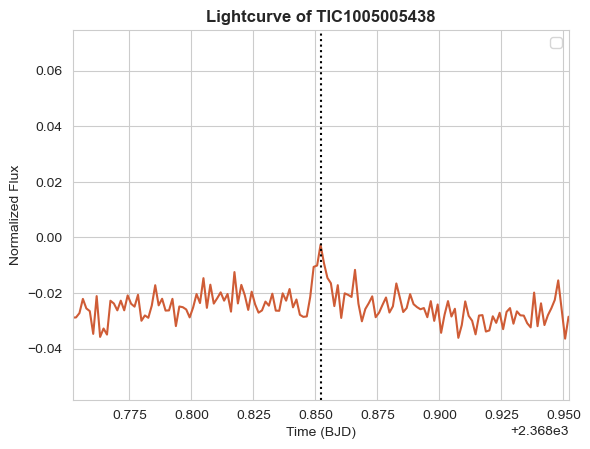

In [6]:
sns.set_style("whitegrid")
plt.plot(lightcurve_data.time, lightcurve_data.flux, color = '#CF5C36')
plt.xlim(testseries['Flare peak time (BJD)'] - 0.1, testseries['Flare peak time (BJD)'] + 0.1)
plt.axvline(x = testseries['Flare peak time (BJD)'], color = 'black', ls = 'dotted')
# plt.axvline(x = 2376.4390, color = '#000000', label = 'Flare', ls = 'dashed')
plt.title('Lightcurve of TIC1005005438', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_60855/919004119.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


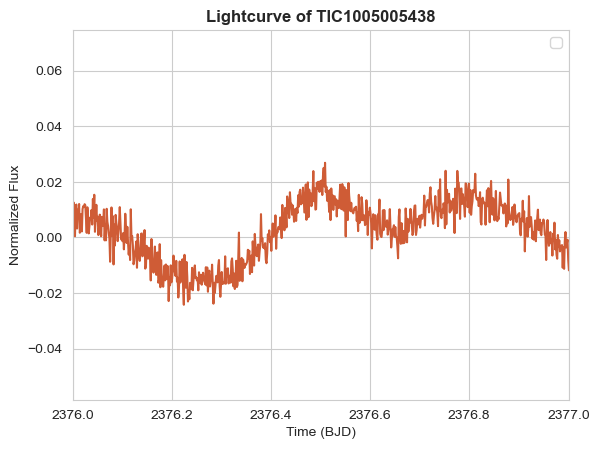

In [7]:
sns.set_style("whitegrid")
plt.plot(lightcurve_data.time, lightcurve_data.flux, color = '#CF5C36')
plt.xlim(2376, 2377)
# plt.axvline(x = 2376.4390, color = '#000000', label = 'Flare', ls = 'dashed')
plt.title('Lightcurve of TIC1005005438', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_54934/4128458831.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


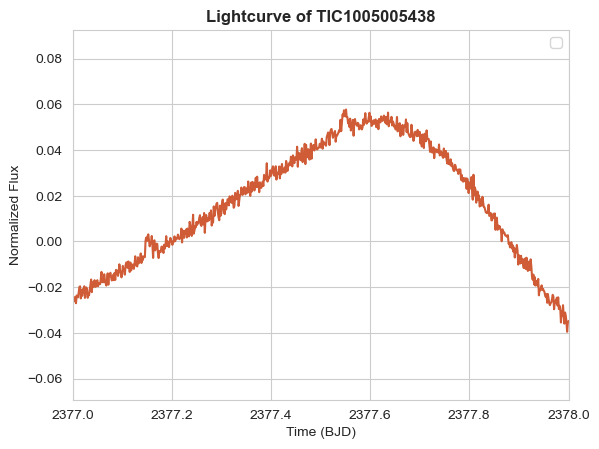

In [10]:

plt.plot(lightcurve_data.time, lightcurve_data.flux, color = '#CF5C36')
plt.xlim(2377, 2378)
# plt.axvline(x = 2376.4390, color = '#000000', label = 'Flare', ls = 'dashed')
plt.title('Lightcurve of TIC1005005438', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_60855/3858146051.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


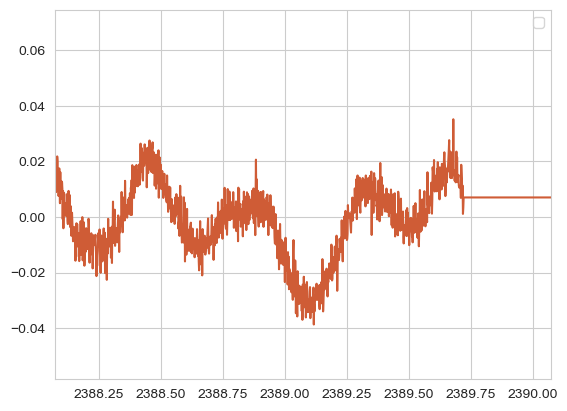

In [8]:

sns.set_style("whitegrid")
plt.plot(lightcurve_data.time, lightcurve_data.flux, color = '#CF5C36')
# plt.axvline(x = 2389.0737 , color = '#000000', label = 'Flare', ls = 'dashed')
plt.xlim(2389.0737 - 1, 2389.0737 + 1)
plt.legend()
plt.show()

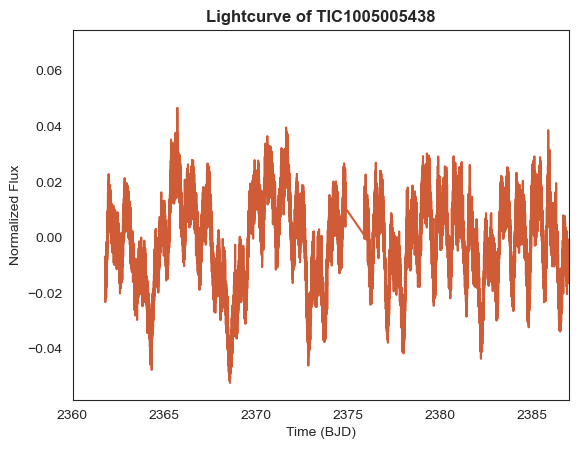

In [9]:

sns.set_style("white")
plt.plot(lightcurve_data.time, lightcurve_data.flux, color = '#CF5C36')
# plt.axvline(x = 2389.0737 , color = '#000000', label = 'Flare', ls = 'dashed')
plt.xlim(2360, 2387)

plt.title('Lightcurve of TIC1005005438', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
# plt.legend()
plt.show()

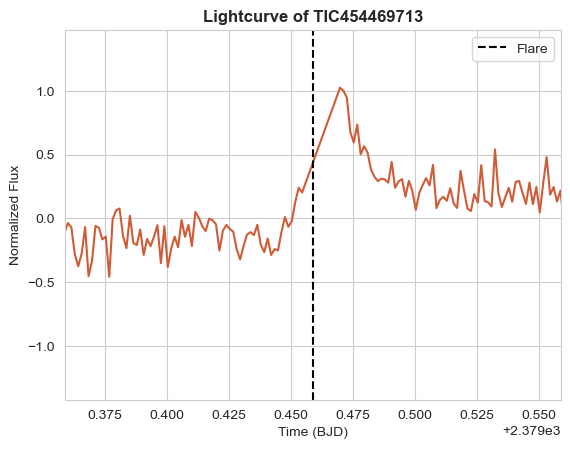

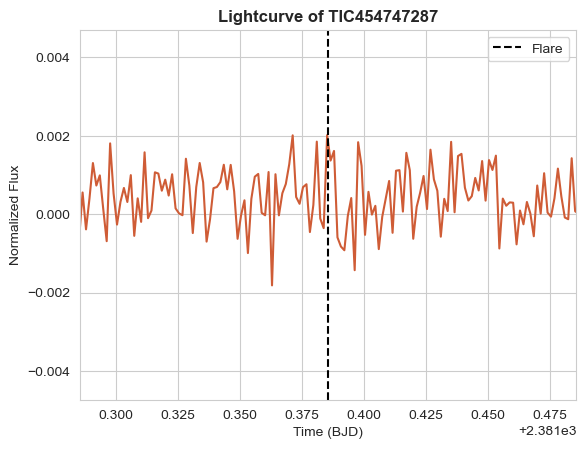

KeyboardInterrupt: 

In [13]:
for _, row in flarey[-50:].iterrows():
    name = f'TIC{row['TIC']}'
    lightcurve_data = LightcurveData(name, 120)

    sns.set_style("whitegrid")
    plt.plot(lightcurve_data.time, lightcurve_data.flux, color = '#CF5C36')
    plt.axvline(x = row['Flare peak time (BJD)'], color = '#000000', ls = 'dashed', label = 'Flare')
    plt.xlim(row['Flare peak time (BJD)'] - 0.1, row['Flare peak time (BJD)'] + 0.1)

    plt.title(f'Lightcurve of {name}', fontweight = 'bold')
    plt.xlabel('Time (BJD)')
    plt.ylabel('Normalized Flux')
    plt.legend()
    plt.show()



In [10]:
lightcurve_data = LightcurveData('TIC462146751', 120)
lcsine = LCSine(lightcurve_data)

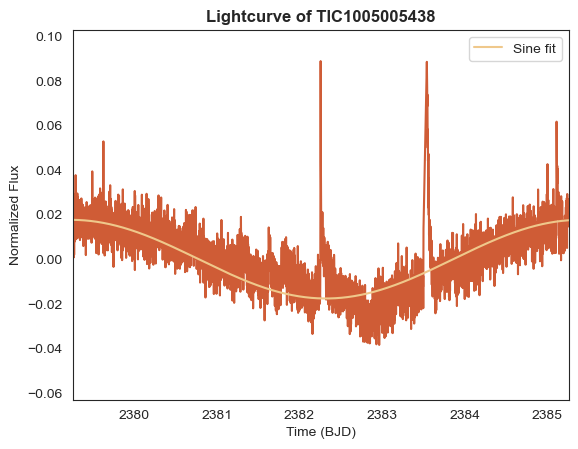

In [11]:
plt.plot(lightcurve_data.time, lightcurve_data.flux, color = '#CF5C36')
plt.plot(lightcurve_data.time, lcsine.sine_fit.best_fit, label = 'Sine fit', color = '#EFC88B')
# plt.xlim(2382.2549 - 0.1, 2382.2549 + 0.1)
plt.xlim(2382.2549 - 3, 2382.2549 + 3)
# plt.axvline(x = 2382.2549, color = '#000000', label = 'Flare', ls = 'dashed')
plt.title('Lightcurve of TIC1005005438', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()


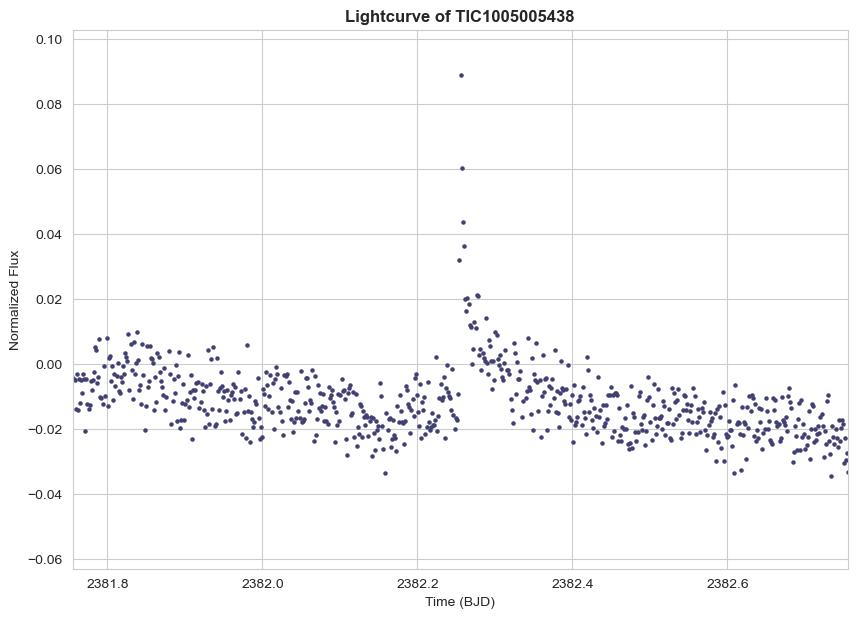

In [41]:
flare_time = 2382.2549

sns.set_style(style='whitegrid')
plt.figure(figsize=(10,7))
plt.scatter(lightcurve_data.time, lightcurve_data.flux, color = '#414073', s =5)
# plt.plot(lightcurve_data.time, lightcurve_data.flux, color = 'b')
# plt.axvline(x = flare_time, c = '#F18805', ls = 'dashed', lw = 2)
# plt.plot(lightcurve_data.time, lcsine.sine_fit.best_fit, label = 'Sine fit', color = '#EFC88B')
# plt.xlim(2382.2549 - 0.1, 2382.2549 + 0.1)
plt.xlim(flare_time-0.5, flare_time + 0.5)
# plt.axvline(x = 2382.2549, color = '#000000', label = 'Flare', ls = 'dashed')
plt.title('Lightcurve of TIC1005005438', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
# plt.legend()
plt.show()

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_7518/2570786634.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


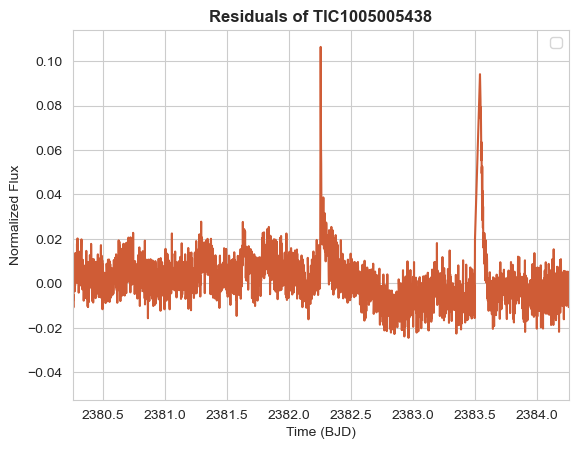

In [14]:
residuals = lightcurve_data.flux - lcsine.sine_fit.best_fit

plt.plot(lightcurve_data.time, residuals, color = '#CF5C36')
# plt.plot(lightcurve_data.time, lcsine.sine_fit.best_fit, label = 'Sine fit', color = '#EFC88B')
# plt.xlim(2382.2549 - 0.1, 2382.2549 + 0.1)
plt.xlim(2382.2549 - 2, 2382.2549 + 2)
# plt.axvline(x = 2382.2549, color = '#000000', label = 'Flare', ls = 'dashed')
plt.title('Residuals of TIC1005005438', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()


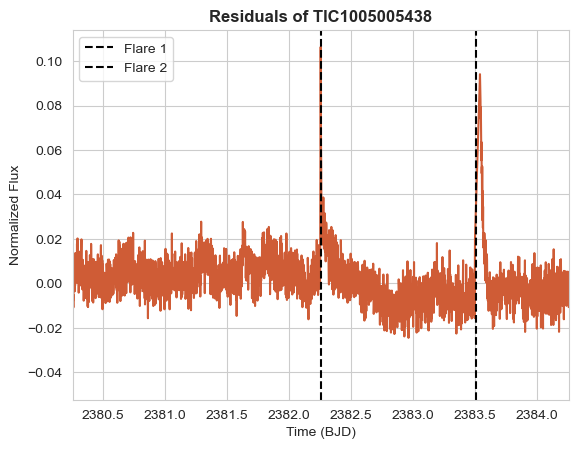

In [15]:
residuals = lightcurve_data.flux - lcsine.sine_fit.best_fit

plt.plot(lightcurve_data.time, residuals, color = '#CF5C36')
# plt.plot(lightcurve_data.time, lcsine.sine_fit.best_fit, label = 'Sine fit', color = '#EFC88B')
# plt.xlim(2382.2549 - 0.1, 2382.2549 + 0.1)
plt.xlim(2382.2549 - 2, 2382.2549 + 2)
plt.axvline(x = 2382.2549, color = '#000000', label = 'Flare 1', ls = 'dashed')
plt.axvline(x = 2383.5049, color = '#000000', label = 'Flare 2', ls = 'dashed')
plt.title('Residuals of TIC1005005438', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

In [47]:
# find flare
flare_index = np.argmin(np.abs(lightcurve_data.time - 2382.2549))
flare_index

np.int64(28257)

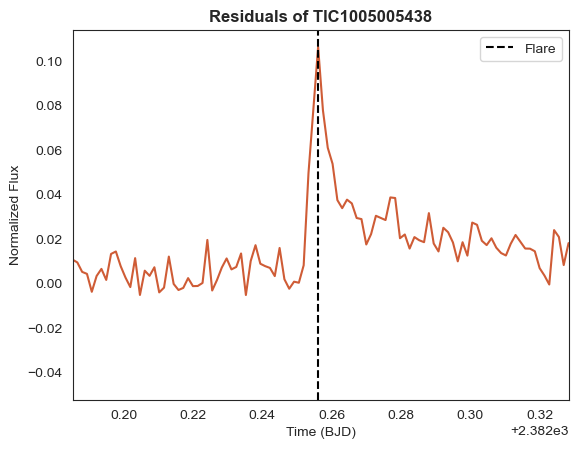

In [ ]:
# create example of input data here 
residuals = lightcurve_data.flux - lcsine.sine_fit.best_fit
plt.fig()

sns.set_style("white")
plt.plot(lightcurve_data.time, residuals, color = '#CF5C36')
# plt.plot(lightcurve_data.time, lcsine.sine_fit.best_fit, label = 'Sine fit', color = '#EFC88B')
# plt.xlim(2382.2549 - 0.1, 2382.2549 + 0.1)
plt.axvline(x = lightcurve_data.time[flare_index], color = '#000000', label = 'Flare', ls = 'dashed')
plt.xlim(lightcurve_data.time[flare_index - 50], lightcurve_data.time[flare_index + 50])
# plt.axvline(x = 2383.5049, color = '#000000', label = 'Flare 2', ls = 'dashed')
plt.title('Residuals of TIC1005005438', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

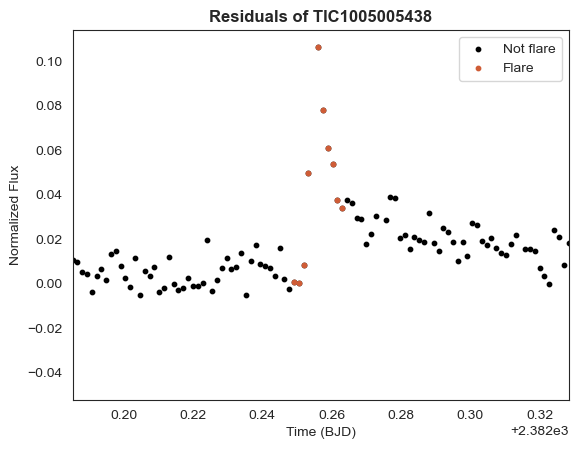

In [50]:
flare_time = lightcurve_data.time[(flare_index - 4):(flare_index + 6)] 
flare_residuals = residuals[(flare_index - 4):(flare_index + 6)] 

plt.scatter(lightcurve_data.time, residuals, label = 'Not flare',  color = '#000000', s=10)
plt.scatter(flare_time, flare_residuals, label = 'Flare',  color = '#CF5C36', s = 10)
plt.xlim(lightcurve_data.time[flare_index - 50], lightcurve_data.time[flare_index + 50])
plt.title('Residuals of TIC1005005438', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

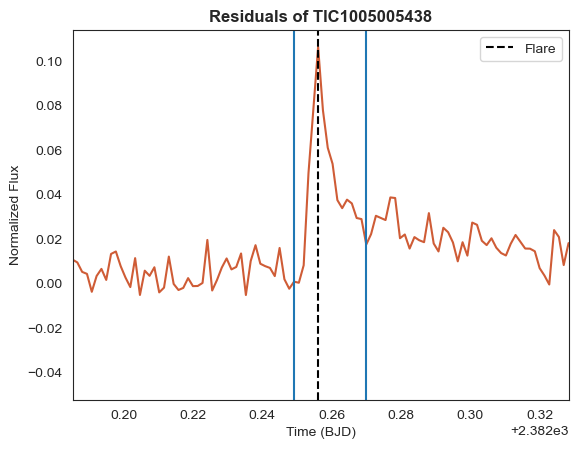

In [19]:
# create example of input data here 
residuals = lightcurve_data.flux - lcsine.sine_fit.best_fit

sns.set_style("white")
plt.plot(lightcurve_data.time, residuals, color = '#CF5C36')
plt.axvline(x = lightcurve_data.time[flare_index], color = '#000000', label = 'Flare', ls = 'dashed')

plt.axvline(x = lightcurve_data.time[flare_index - 4])
plt.axvline(x = lightcurve_data.time[flare_index + 10])
plt.xlim(lightcurve_data.time[flare_index - 50], lightcurve_data.time[flare_index + 50])
# plt.axvline(x = 2383.5049, color = '#000000', label = 'Flare 2', ls = 'dashed')
plt.title('Residuals of TIC1005005438', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

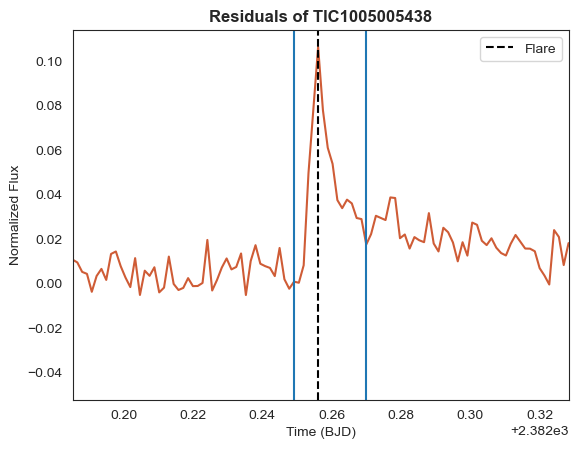

In [20]:
# create example of input data here 
residuals = lightcurve_data.flux - lcsine.sine_fit.best_fit

sns.set_style("white")
plt.plot(lightcurve_data.time, residuals, color = '#CF5C36')
# plt.plot(lightcurve_data.time, lcsine.sine_fit.best_fit, label = 'Sine fit', color = '#EFC88B')
# plt.xlim(2382.2549 - 0.1, 2382.2549 + 0.1)
plt.axvline(x = lightcurve_data.time[flare_index], color = '#000000', label = 'Flare', ls = 'dashed')

plt.axvline(x = lightcurve_data.time[flare_index - 4])
plt.axvline(x = lightcurve_data.time[flare_index + 10])
plt.xlim(lightcurve_data.time[flare_index - 50], lightcurve_data.time[flare_index + 50])
# plt.axvline(x = 2383.5049, color = '#000000', label = 'Flare 2', ls = 'dashed')
plt.title('Residuals of TIC1005005438', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_7518/919004119.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


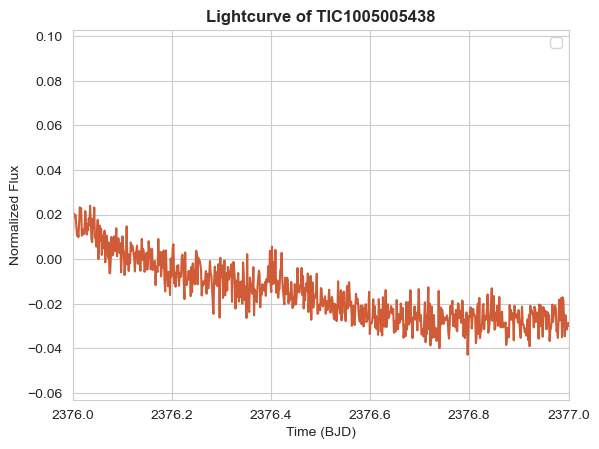

In [21]:
sns.set_style("whitegrid")
plt.plot(lightcurve_data.time, lightcurve_data.flux, color = '#CF5C36')
plt.xlim(2376, 2377)
# plt.axvline(x = 2376.4390, color = '#000000', label = 'Flare', ls = 'dashed')
plt.title('Lightcurve of TIC1005005438', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

In [51]:
lightcurve_data = LightcurveData('TIC465764610', 120)
lcsine = LCSine(lightcurve_data)

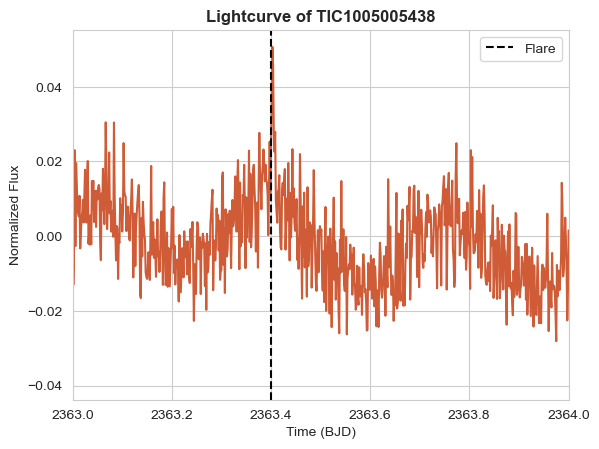

In [34]:
sns.set_style("whitegrid")
plt.plot(lightcurve_data.time, lightcurve_data.flux, color = '#CF5C36')
plt.xlim(2363, 2364)
plt.axvline(x = 2363.4001, color = '#000000', label = 'Flare', ls = 'dashed')
plt.title('Lightcurve of TIC465764610', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

In [52]:
# find flare
flare_index = np.argmin(np.abs(lightcurve_data.time - 2363.4001))
flare_index

np.int64(1168)

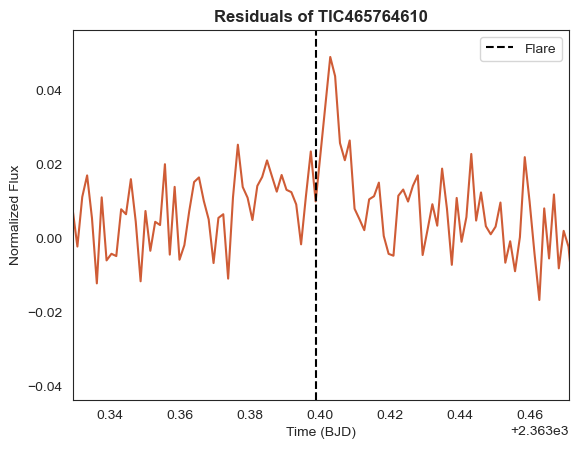

In [53]:
# create example of input data here 
residuals = lightcurve_data.flux - lcsine.sine_fit.best_fit

sns.set_style("white")
plt.plot(lightcurve_data.time, residuals, color = '#CF5C36')
# plt.plot(lightcurve_data.time, lcsine.sine_fit.best_fit, label = 'Sine fit', color = '#EFC88B')
# plt.xlim(2382.2549 - 0.1, 2382.2549 + 0.1)
plt.axvline(x = lightcurve_data.time[flare_index], color = '#000000', label = 'Flare', ls = 'dashed')
plt.xlim(lightcurve_data.time[flare_index - 50], lightcurve_data.time[flare_index + 50])
# plt.axvline(x = 2383.5049, color = '#000000', label = 'Flare 2', ls = 'dashed')
plt.title('Residuals of TIC465764610', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

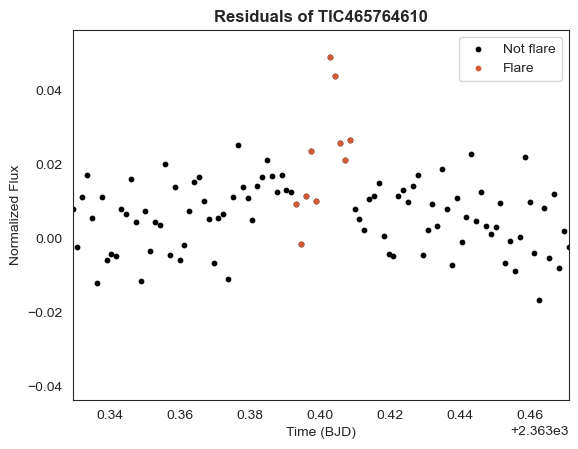

In [55]:
flare_time = lightcurve_data.time[(flare_index - 4):(flare_index + 6)] 
flare_residuals = residuals[(flare_index - 4):(flare_index + 6)] 

plt.scatter(lightcurve_data.time, residuals, label = 'Not flare',  color = '#000000', s = 10)
plt.scatter(flare_time, flare_residuals, label = 'Flare',  color = '#CF5C36', s = 10)
plt.xlim(lightcurve_data.time[flare_index - 50], lightcurve_data.time[flare_index + 50])
plt.title('Residuals of TIC465764610', fontweight = 'bold')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()